## Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import plotly_express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
import scipy.stats as stats
import bamboolib as bam
import statsmodels.api as sm

## Reading Dataset

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/JaiminBrahmbhatt/MidsemQue/main/data.csv')
data

,x,y,z,w
0,-2.827301,8.481691,11.308992,-0.028273
1,6.219975,4.447255,-1.772720,0.625403
2,-1.791216,-0.101472,1.689744,1.106271
3,-4.009833,-1.099644,2.910189,1.640629
4,-5.509479,-2.312615,3.196864,2.175543
...,...,...,...,...
495,4.943165,9.199648,4.256484,-2.722313
496,-1.349718,-8.613590,-7.263872,-2.244135
497,6.076347,14.718005,8.641659,-1.619964
498,-3.666158,4.536425,8.202583,-1.160845


#### Note : All graphs are interactive to play with data visualization

## 1. Determine what the distribution of each datum is and give the appropriate parameters for that distirubion:

1. Normal

2. Continuos Uniform

3. None of these (Neither)

**So what is Normal Distibuted Data ?**

A normal distribution is a common probability distribution . It has a shape often referred to as a "bell curve."

Many everyday data sets typically follow a normal distribution: for example, the heights of adult humans, the scores on a test given to a large class, errors in measurements.

The normal distribution is always symmetrical about the mean.

The standard deviation is the measure of how spread out a normally distributed set of data is.  It is a statistic that tells you how closely all of the examples are gathered around the mean in a data set.  The shape of a normal distribution is determined by the mean and the standard deviation. The steeper the bell curve, the smaller the standard deviation.  If the examples are spread far apart, the bell curve will be much flatter, meaning the standard deviation is large. 

Reference - https://www.varsitytutors.com/hotmath/hotmath_help/topics/normal-distribution-of-data#:~:text=The%20shape%20of%20a%20normal,the%20standard%20deviation%20is%20large.

So to find we can either plot the graphs based on their frequency by dividing them in small bins or we can plot the histograms or Kernel Distributed Estimation.

**So here we calculate mean, standard deviation and z-score**

In [40]:
data

,x,y,z,w
0,-2.827301,8.481691,11.308992,-0.028273
1,6.219975,4.447255,-1.772720,0.625403
2,-1.791216,-0.101472,1.689744,1.106271
3,-4.009833,-1.099644,2.910189,1.640629
4,-5.509479,-2.312615,3.196864,2.175543
...,...,...,...,...
495,4.943165,9.199648,4.256484,-2.722313
496,-1.349718,-8.613590,-7.263872,-2.244135
497,6.076347,14.718005,8.641659,-1.619964
498,-3.666158,4.536425,8.202583,-1.160845


In [41]:
data.mean()

x   -0.526923
y   -0.023169
z    0.511323
w   -0.005269
dtype: float64

In [42]:
data.std()

x    4.646678
y    6.683136
z    4.966079
w    6.345948
dtype: float64

**Calculating Z-score of whole dataset based on axis = 0 (i.e based on individual columns)**

In [43]:
datazscore = data.apply(stats.zscore)
datazscore

,x,y,z,w
0,-0.495554,NaN,2.176462,-0.003629
1,1.453437,NaN,-0.460389,0.099481
2,-0.272358,NaN,0.237532,0.175333
3,-0.750299,NaN,0.483534,0.259622
4,-1.073357,NaN,0.541319,0.343998
...,...,...,...,...
495,1.178383,NaN,0.754904,-0.428583
496,-0.177249,NaN,-1.567229,-0.353156
497,1.422496,NaN,1.638814,-0.254700
498,-0.676263,NaN,1.550310,-0.182279


So here we see that y column shows Z-score of 0 that implies that Column Y has missing value

In [44]:
data.isnull().sum()

x    0
y    1
z    0
w    0
dtype: int64

It is better to replace the missing value here I am considering mean value as there is only 1 missing value in dataframe

In [45]:
data[['y']] = data[['y']].fillna(data[['y']].mean())


**Again calculating Z-score of whole dataset based on axis = 0 (i.e based on individual columns)**

In [46]:
datazscore = data.apply(stats.zscore)
datazscore

,x,y,z,w
0,-0.495554,1.275138,2.176462,-0.003629
1,1.453437,0.670253,-0.460389,0.099481
2,-0.272358,-0.011740,0.237532,0.175333
3,-0.750299,-0.161396,0.483534,0.259622
4,-1.073357,-0.343258,0.541319,0.343998
...,...,...,...,...
495,1.178383,1.382782,0.754904,-0.428583
496,-0.177249,-1.287966,-1.567229,-0.353156
497,1.422496,2.210152,1.638814,-0.254700
498,-0.676263,0.683622,1.550310,-0.182279


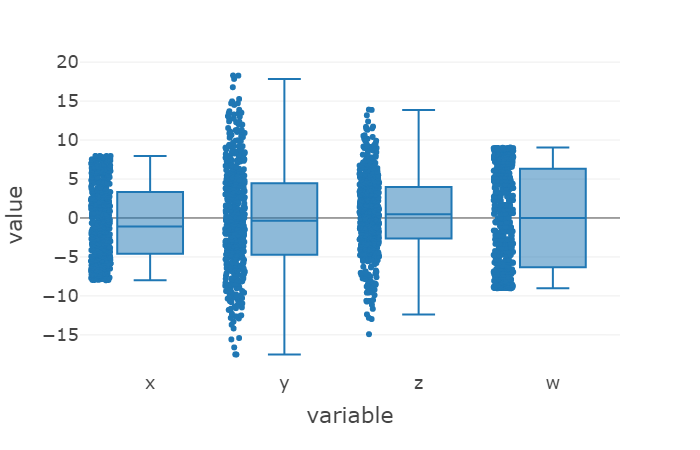

In [47]:
fig = px.box(data, points='all', template='presentation')
fig.show("png")

### Plot based on KDE

Plotting the data based on kernel distrubution estimation (kde) gives us the proper distrubution of values in columns

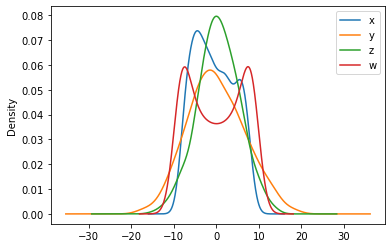

In [48]:
ax = data.plot.kde()

From these distribution we can say that, 

w = neither normal nor continuous uniform

x = neither normal nor continous uniform

y = normal distribution

z = normal distribution


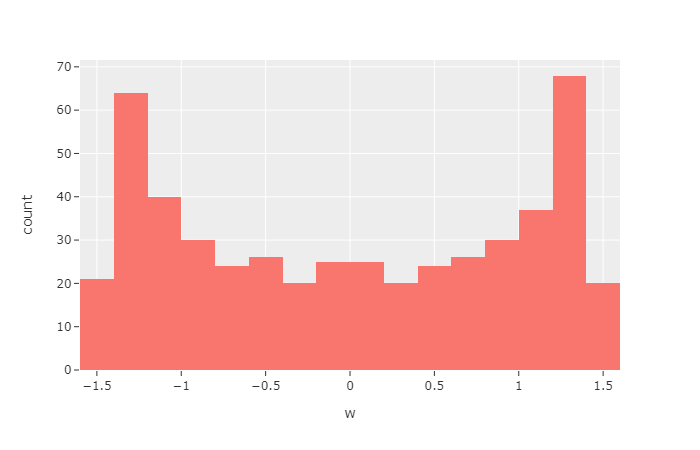

In [49]:
fig = px.histogram(datazscore, x='w'  ,template='ggplot2')
fig.show("png")

Column W seems to be neither normally distributed nor continuous uniform

In [14]:
fig = px.histogram(datazscore, x='x'  ,template='ggplot2')
fig.show("png")

Column X seems to be neither normally distributed nor continuous uniform

In [15]:
fig = px.histogram(datazscore, x='y'  ,template='ggplot2')
fig.show("png")

Column Y seems to be normally distributed

In [16]:
fig = px.histogram(datazscore, x='z'  ,template='ggplot2')
fig.show("png")

Column Z seems to be normally distributed

## 2. Determine if the datum is periodic, and if so, what is it's frequency.

So here we start with plotting the data for each column w, x, y and z

In [17]:
fig = px.line(data , template='presentation')
fig.show("png")

### To better visualize everything plotting each column individually to get clear picture

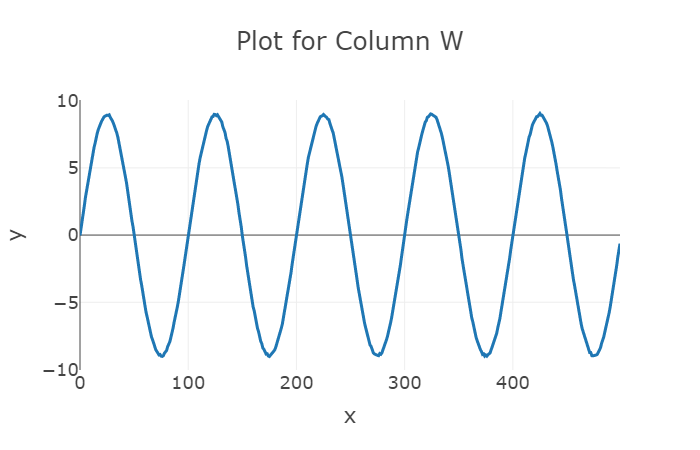

In [53]:
fig = px.line(y=data['w'], template='presentation' , title='Plot for Column W')
fig.show("png")

So here looking at graph we can directly say that there is some sort of periodicity in column W

**And looking at the graph we can say that 100 instances are taken by the series to complete one cycle which means it will take about 3.333333333 seconds to repeat itself when we take regular interval of 30Hz or in other words it will repeat itself every 100 instances. So, here in this series there are 5 cycles in total**


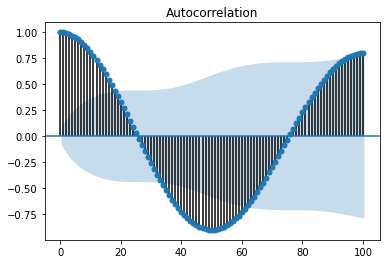

In [64]:
sm.graphics.tsa.plot_acf(data['w'], lags=100)
plt.show()

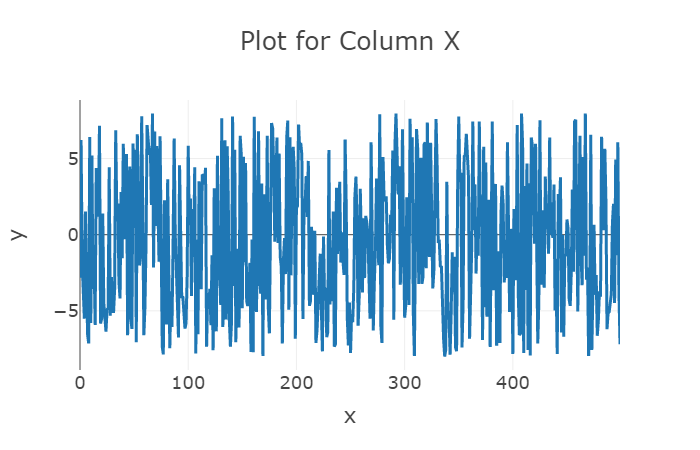

In [54]:
fig = px.line(y=data['x'], template='presentation',  title='Plot for Column X')
fig.show("png")

So here looking at graph we cannot say if Column X has periodicity

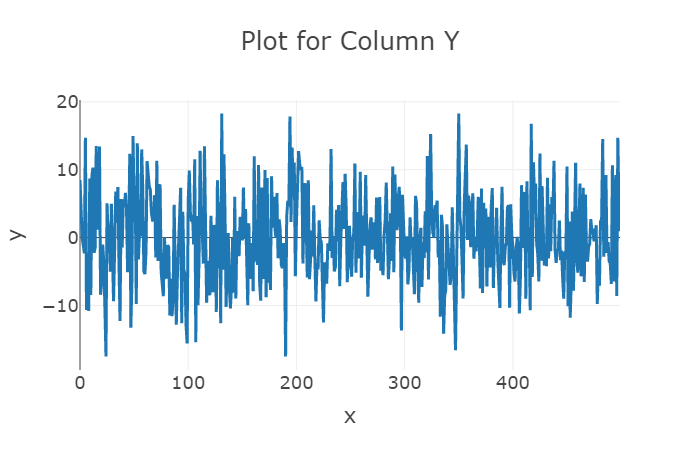

In [55]:
fig = px.line(y=data['y'], template='presentation',  title='Plot for Column Y')
fig.show("png")

So here looking at graph we cannot say if Column Y has periodicity

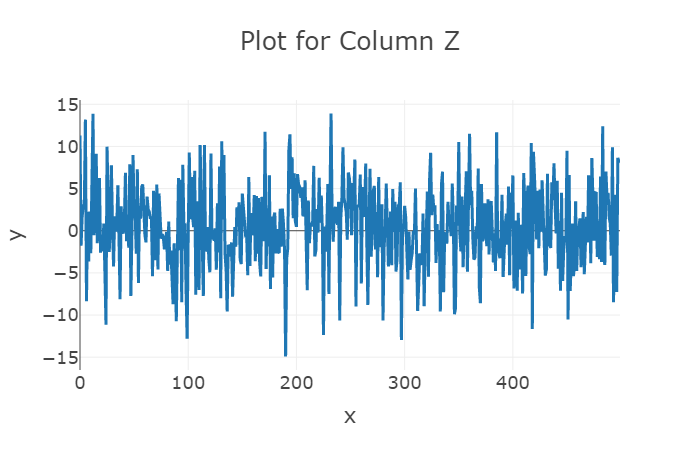

In [56]:
fig = px.line(y=data['z'], template='presentation',  title='Plot for Column Z')
fig.show("png")

So here looking at graph we cannot say if Column Z has periodicity

## 3. Perform a Spearman and Pearson Correlation on each pair of datums and determine if any of the variables are correlated.  Provide the correlation values.


### Performing Spearman Correlation on each pair of datums

In [28]:
spearmancorr = data.corr(method='spearman')
spearmancorr

,x,y,z,w
x,1.000000,0.676779,-0.047540,-0.042764
y,0.676779,1.000000,0.674706,-0.021197
z,-0.047540,0.674706,1.000000,0.027298
w,-0.042764,-0.021197,0.027298,1.000000


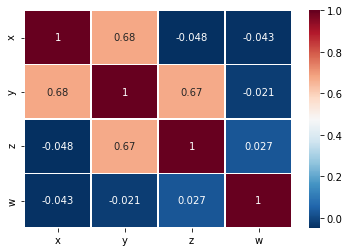

In [29]:
sns.heatmap(spearmancorr, 
            xticklabels=spearmancorr.columns,
            yticklabels=spearmancorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Using Spearman Correlation we can say that 

X --> Y has decent positive relationship

Y --> Z has decent positive relationship


### Performing Pearson Correlation on each pair of datums

In [32]:
pearsoncorr = data.corr(method='pearson')
pearsoncorr

,x,y,z,w
x,1.000000,0.667696,-0.035754,-0.057403
y,0.667696,1.000000,0.719656,-0.024719
z,-0.035754,0.719656,1.000000,0.021414
w,-0.057403,-0.024719,0.021414,1.000000


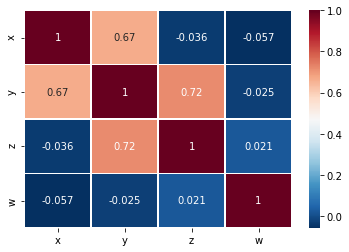

In [33]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Using Spearman Correlation we can say that 

X --> Y has decent positive relationship

Y --> Z has decent positive relationship


## 4. Produce a scatter plot of each pair and a histogram of each variable.

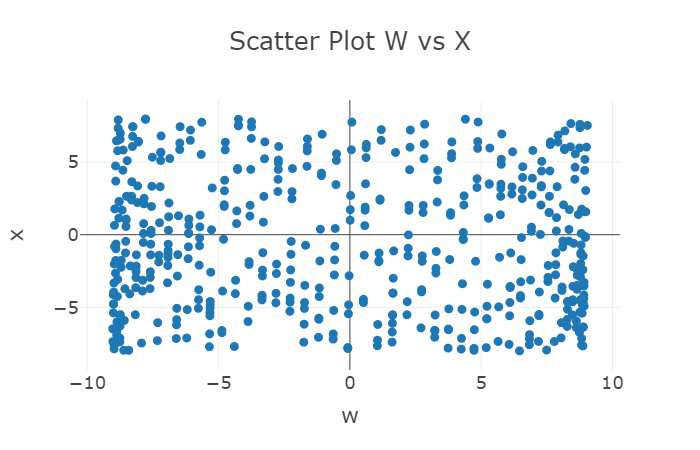

In [57]:
fig = px.scatter(data, x='w', y='x', template='presentation' ,  title='Scatter Plot W vs X')
fig.show("png")

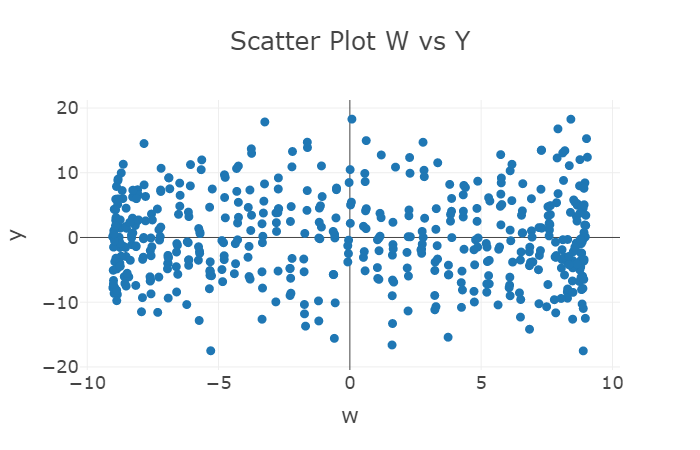

In [58]:
fig = px.scatter(data, x='w', y='y' ,template='presentation'  ,title='Scatter Plot W vs Y')
fig.show("png")

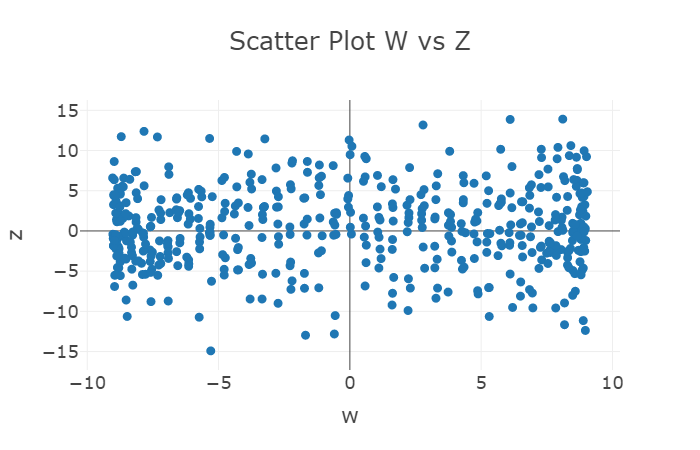

In [59]:
fig = px.scatter(data, x='w', y='z'  ,template='presentation' ,title='Scatter Plot W vs Z')
fig.show("png")

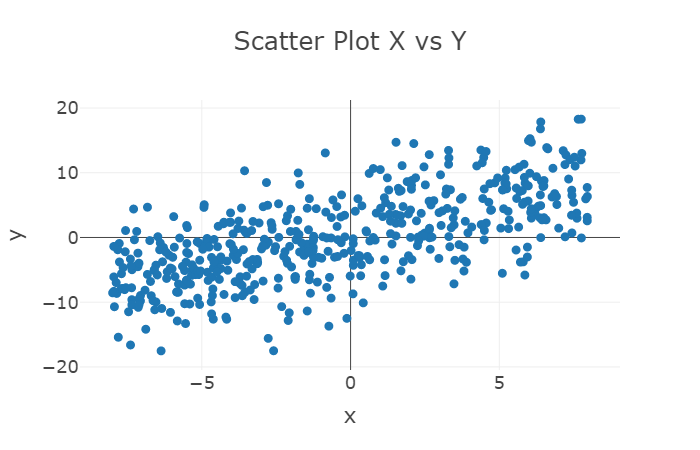

In [60]:
fig = px.scatter(data, x='x', y='y'  ,template='presentation' ,title='Scatter Plot X vs Y')
fig.show("png")

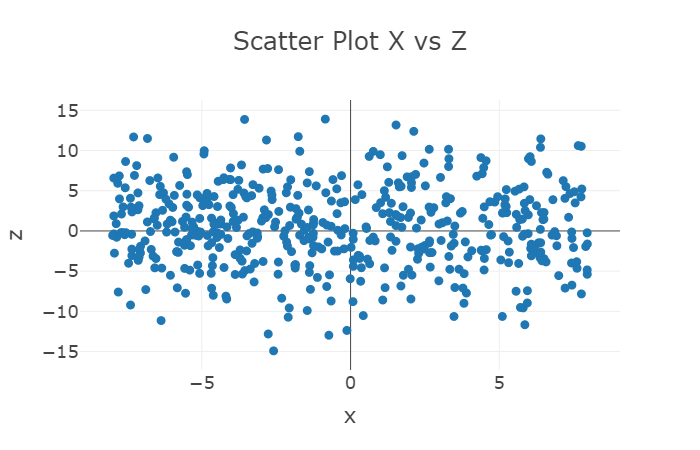

In [61]:
fig = px.scatter(data, x='x', y='z'  ,template='presentation' ,title='Scatter Plot X vs Z')
fig.show("png")

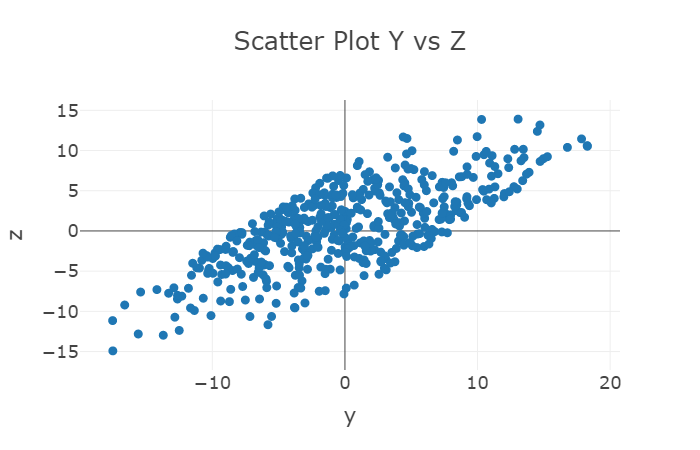

In [62]:
fig = px.scatter(data, x='y', y='z'  ,template='presentation' ,title='Scatter Plot Y vs Z')
fig.show("png")

## 5. Performing autocorrelation on each variable

In [41]:
data['x'].autocorr()

0.05136999989773895

Seems there is very weak to none correlation (pattern) for datum X

In [42]:
data['y'].autocorr()

-0.02674083959141378

Seems there is negative and very weak to none correlation (pattern) for datum Y

In [43]:
data['z'].autocorr()

-0.10454861857811215

Seems there is very weak to none correlation (pattern) for datum Z

In [44]:
data['w'].autocorr()

0.9979852033718756

It shows very strong correlation (pattern) for datum W

### Visualization of Autocorrelation 

x


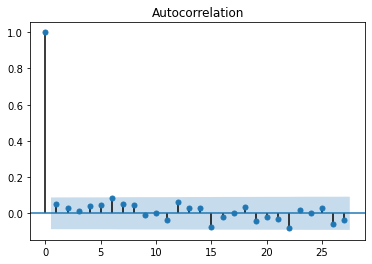

y


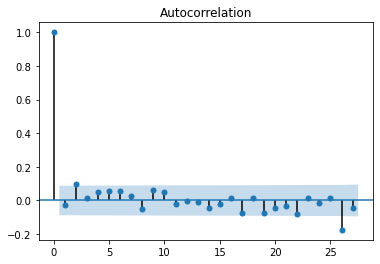

z


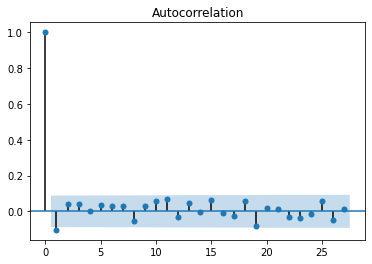

w


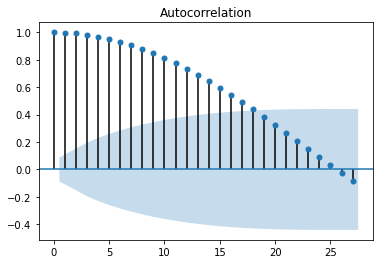

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
col = data.columns
for i in col:
    plot_acf(data[i])
    print(i)
    plt.show()